In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import pickle
import sys
sys.path.insert(0, '../functions/')
import interface_GAMS as iG

TF_KALE_tpm = pd.read_csv('../data/validation_data_sets/TF_KALE_merged_log_tpm.csv', index_col = 0)

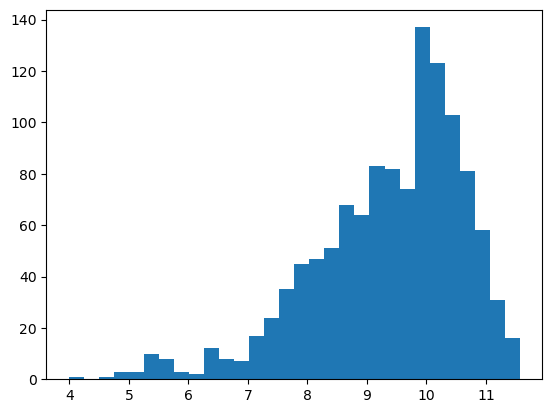

In [9]:
# plot ptsG expression across samples, highlight crp ones
plt.hist(TF_KALE_tpm.loc['b1101'], bins = 30)
plt.show()

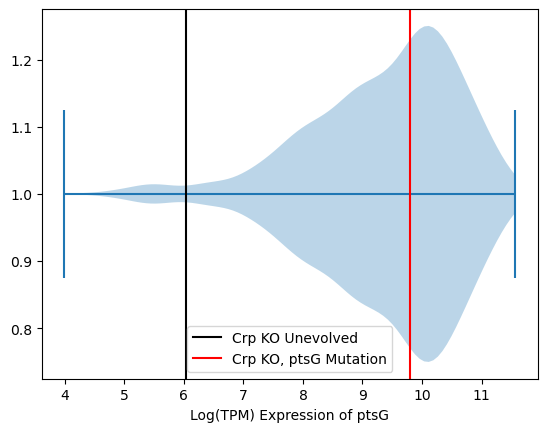

In [24]:
plt.violinplot(TF_KALE_tpm.loc['b1101'], vert = False)
plt.axvline(x = TF_KALE_tpm.loc['b1101']['crp A0 F0 I1 R1'], c = 'k', label = 'Crp KO Unevolved')
plt.axvline(x = TF_KALE_tpm.loc['b1101']['crp A4 F20 I1 R1'], c = 'red', label = 'Crp KO, ptsG Mutation')
plt.legend()
plt.xlabel('Log(TPM) Expression of ptsG')
plt.savefig('../figures/ptsG_expression.pdf', transparent = True)
plt.show()

# compare predicted cActivator activity compared to glucose source across P1K

In [7]:
# first, create the dataframes



# load in necessary files
base_TF_flags_df = pd.read_csv('../data/TF_flags_expanded.csv', index_col = 0)
pickle_in = open('../data/gene_to_operon_to_motif_scores_dist_to_TSS.pkl', 'rb')
gene_to_operon_to_motif_scores = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open('../data/b_to_gene.pkl', 'rb')
b_to_gene = pickle.load(pickle_in)
pickle_in.close()
gene_to_b = {v : k for k, v in b_to_gene.items()}
gene_to_b.update({
    'yhbC' : 'b3170',
    #'sroD' : '', # not a real gene
})


case = 'Crp-2___DhaR'

# parse down TF_flags
TF_flags_df = base_TF_flags_df.loc[['Crp-2', 'DhaR']]

# let's find our run_dir
iter_f = 'iter_'+str(max([int(f.split('_')[1]) for f in os.listdir('../GAMs/optimization_runs/'+case) if 'iter_' in f and '.pkl' not in f]))
run_f = 'run_'+str(max([int(f.split('_')[1]) for f in os.listdir('../GAMs/optimization_runs/'+case+'/'+iter_f) if 'run_' in f and '.pkl' not in f]))
GAMs_run_dir = '../GAMs/optimization_runs/'+case+'/'+iter_f+'/'+run_f


mRNA_df, GAMS_calc_cAct, cAct_kd_df, act_metab_df, act_kd_metab_df, GAMS_calc_cInh, cInh_kd_df, inh_metab_df, inh_kd_metab_df = iG.read_multi_GAMs(GAMs_run_dir)


In [12]:
act_metab_df[act_metab_df.iM == 'Crp-2']

,iM,Val
sample,,
p1k_00672,Crp-2,3.800000e-14
p1k_00560,Crp-2,8.122865e-01
p1k_00618,Crp-2,3.004414e+01
p1k_00820,Crp-2,8.584561e-01
p1k_00483,Crp-2,9.031320e+01
...,...,...
p1k_00050,Crp-2,3.449837e-01
p1k_00762,Crp-2,5.354429e+01
p1k_00054,Crp-2,4.239156e+00


114
474


TypeError: object of type 'int' has no len()

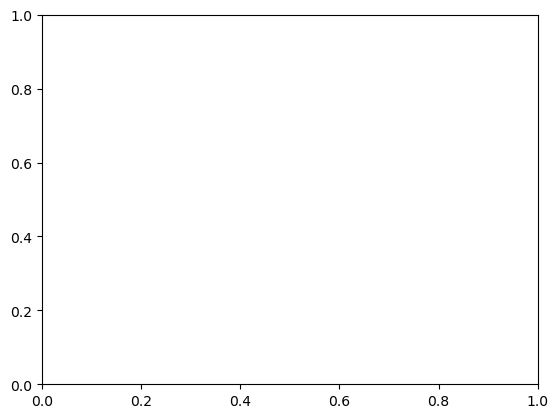

In [60]:
sample_table = pd.read_csv('../data/precise_1k/sample_table.csv', index_col = 0)
keep = []
for index, row in sample_table.iterrows():
    if str(row['Carbon Source (g/L)']) in ['glucose(4)', 'glucose(2)']:
        keep.append(index)
overlap = list(set(keep).intersection(act_metab_df.index))
gluc_metab_df = pd.DataFrame(index = overlap)
gluc_metab_df['metab_pred'] = act_metab_df[act_metab_df.iM == 'Crp-2'].loc[overlap]['Val']
gluc_metab_df['glucose'] = sample_table.loc[overlap]['Carbon Source (g/L)']

datas = []
labels = []
for glucose in ['glucose(2)', 'glucose(4)']:
    bby = gluc_metab_df.loc[gluc_metab_df.glucose == glucose]
    datas.append(bby['metab_pred'].values)
    labels.append(glucose)
    print(len(bby))
plt.boxplot([data for data in datas], labels = labels)
plt.show()

In [50]:
np.log10(datas[0])

array([ -6.86947776,  -0.42546966, -11.52404886, -13.4202164 ,
       -13.41590443, -13.4202164 , -11.65240076, -13.4202164 ,
         0.1304691 , -13.4202164 ,  -7.59657237, -13.2571931 ,
         0.08395432, -13.4202164 , -13.4202164 , -13.4202164 ,
       -10.94015252,   0.11695516, -10.13924313, -13.4139707 ,
        -0.18251169,   1.20721351, -11.56392025,  -9.91633352,
         1.1029671 ,   0.28677077, -13.4202164 , -13.38002211,
       -13.4202164 ,   1.45295014,  -0.47368587, -13.37056189,
       -13.4202164 , -13.37510978, -13.4202164 ,  -0.45385686,
       -13.41293372,  -0.28777731, -13.4202164 , -13.4202164 ,
         1.3740762 ,  -0.79455003, -13.35601634,  -0.39493841,
       -13.4202164 ,  -0.18122949, -13.29971579, -13.4202164 ,
         0.29222299,  -0.31327498, -13.4202164 , -13.4202164 ,
         1.38138173,   1.75301749, -13.4202164 , -10.50457734,
       -13.37293943, -13.32315653,  -0.49528804, -13.4202164 ,
       -13.4202164 ,   1.62362877, -11.7709924 ,  -0.73

114
474


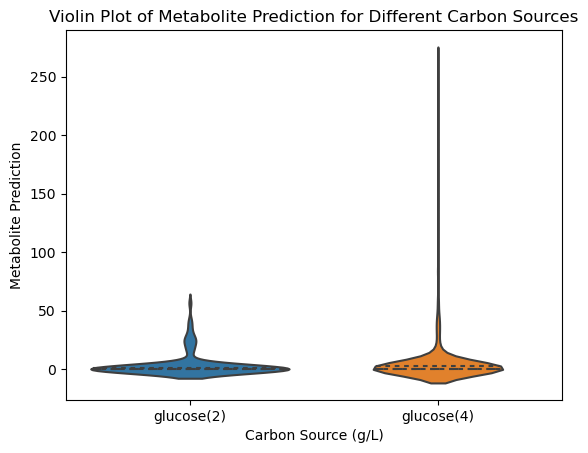

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
sample_table = pd.read_csv('../data/precise_1k/sample_table.csv', index_col=0)

# Filter rows based on condition
keep = []
for index, row in sample_table.iterrows():
    if str(row['Carbon Source (g/L)']) in ['glucose(4)', 'glucose(2)']:
        keep.append(index)
overlap = list(set(keep).intersection(act_metab_df.index))
gluc_metab_df = pd.DataFrame(index=overlap)
gluc_metab_df['metab_pred'] = act_metab_df[act_metab_df.iM == 'Crp-2'].loc[overlap]['Val']
gluc_metab_df['glucose'] = sample_table.loc[overlap]['Carbon Source (g/L)']

# Prepare data for violin plots
datas = []
labels = []
for glucose in ['glucose(2)', 'glucose(4)']:
    bby = gluc_metab_df.loc[gluc_metab_df.glucose == glucose]
    datas.append(bby['metab_pred'].values)
    labels.append(glucose)
    print(len(bby))

# Create violin plots
sns.violinplot(data=datas, inner="quartile")
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.xlabel('Carbon Source (g/L)')
plt.ylabel('Metabolite Prediction')
plt.title('Violin Plot of Metabolite Prediction for Different Carbon Sources')
plt.show()


In [17]:
sample_table

,sample_id,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,...,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates
p1k_00001,control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/2013,2
p1k_00002,control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/2013,2
p1k_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10/2/2013,2
p1k_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10/2/2013,2
p1k_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,fur:wt_fe,True,True,9/5/2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p1k_01051,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3,DDB3,PD-006_del-rpoS_Fed-batch_15h,2,Escherichia coli BW25113 del_rpoS,BW25113,Fed-batch,No,Medium C,...,Suresh Sudarsan,True,True,True,True,DDB3:PD-006_del-rpoS_Fed-batch_15h,True,True,10/1/2020,2
p1k_01052,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3,DDB3,PD-009_del-tnaA_Batch_6h,1,Escherichia coli BW25113 del_tnaA,BW25113,Batch,No,Medium C,...,Suresh Sudarsan,True,True,True,True,DDB3:PD-009_del-tnaA_Batch_6h,True,False,10/1/2020,1
p1k_01053,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3,DDB3,PD-009_del-tnaA_Fed-batch_6h,1,Escherichia coli BW25113 del_tnaA,BW25113,Fed-batch,No,Medium C,...,Suresh Sudarsan,True,True,True,True,DDB3:PD-009_del-tnaA_Fed-batch_6h,True,False,10/1/2020,1
p1k_01054,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3,DDB3,PD-009_del-tnaA_Fed-batch_15h,1,Escherichia coli BW25113 del_tnaA,BW25113,Fed-batch,No,Medium C,...,Suresh Sudarsan,True,True,True,True,DDB3:PD-009_del-tnaA_Fed-batch_15h,True,True,10/1/2020,2
